In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from monai.losses import DiceLoss, FocalLoss, TverskyLoss
from model_explore.pytorch import io, trainer, utils
from monai.metrics import ConfusionMatrixMetric
from monai.networks.nets import UNet
import matplotlib.pyplot as plt
import torch, mlflow

/mnt/jonathan/pyUNET/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
voxel_size = 10
algorithm = 'DenoisET'
seg_name = 'remotetargets'

# Experimental RunIDs
# copick_config_path = "/mnt/dataportal/ml_challenge/config.json"
# run_ids = ['16468', '16466']

# Simulation RunIDs
copick_config_path = "/mnt/dataportal/synthetic_ml_challenge/config.json"
run_ids = ['TS_18', 'TS_22']

root = io.load_copick_config(copick_config_path)
train_files = io.load_training_data(root, run_ids, voxel_size, algorithm, seg_name)

Loading Training Data: 100%|██████████| 2/2 [00:03<00:00,  1.94s/it]


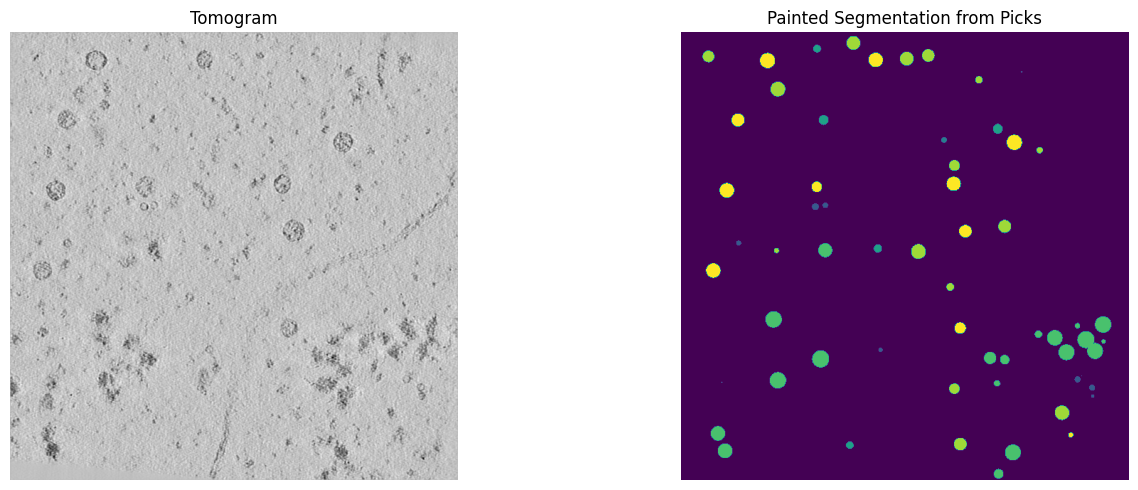

In [6]:
tomo_index = 0
vol_slice = 90

# Plot the images
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Tomogram')
plt.imshow(train_files[tomo_index]['image'][vol_slice],cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Painted Segmentation from Picks')
plt.imshow(train_files[tomo_index]['label'][vol_slice], cmap='viridis')
plt.axis('off')

plt.tight_layout()
plt.show()

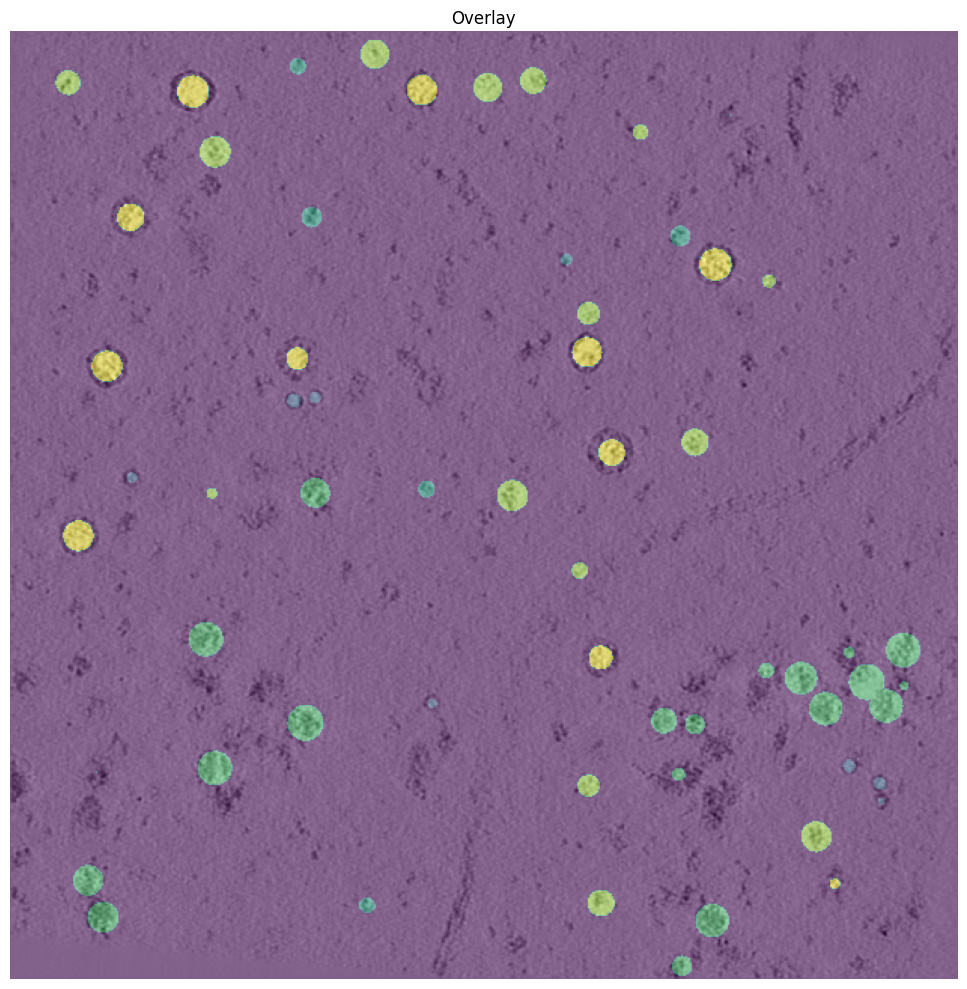

In [7]:
plt.figure(figsize=(10, 10))
plt.title('Overlay')
plt.imshow(train_files[tomo_index]['image'][vol_slice], cmap='gray')
plt.imshow(train_files[tomo_index]['label'][vol_slice], cmap='viridis', alpha=0.5)  # Add alpha=0.5 for 50% transparency
plt.axis('off')

plt.tight_layout()
plt.show()